# **CS 351L - AI Lab**

## **Instructor: Mr. Usama Arshad, PhD CS**
### **BS Cybersecurity - 5th Semester**

---

### **Welcome to the AI Lab Course!**

In this lab, we will explore various concepts in Artificial Intelligence (AI), focusing on practical implementations using Python. You will work on hands-on exercises and projects that will help you understand AI techniques, algorithms, and tools commonly used in the field of AI and cybersecurity.

### **Course Overview:**
- **Course Code:** CS 351L
- **Program:** BS Cybersecurity
- **Semester:** 5th

---



### **CS 351L - AI Lab - Lab 6**


---

### **Learning Objectives:**

By the end of this lab, students will be able to:

1. Understand the concepts of unsupervised learning, focusing on clustering techniques.
2. Learn the k-Means clustering algorithm and implement it in Python.
3. Explore the hierarchical clustering method, specifically the agglomerative approach.
4. Learn how to create and interpret dendrograms for hierarchical clustering.



---

### **Let's get started!**

![Alt Text](https://cdn.dribbble.com/users/1523313/screenshots/16134521/media/3975730626bdae63cf9b25d3b634bac3.gif)


# **Lab 6: Introduction to Unsupervised Learning - Clustering**

## **Introduction to Unsupervised Learning**
Unsupervised learning is a type of machine learning where the algorithm learns patterns from data without any labels or predefined outcomes. The goal is to discover hidden structures in the data.

### **Overview of Unsupervised Learning:**
- In **unsupervised learning**, we don't provide the machine with answers or outcomes. The algorithm tries to group or organize the data based on similarities.
- One of the main techniques in unsupervised learning is **clustering**.

### **Applications of Unsupervised Learning:**
- **Customer segmentation** in marketing (grouping customers with similar preferences).
- **Document clustering** in Natural Language Processing (NLP) (grouping similar texts).
- **Anomaly detection** in security or fraud detection.

### **Why Clustering is Important:**
- **Clustering** is used to group data points into clusters (groups) where points in the same group are similar to each other, and points in different groups are distinct.
- It helps us **find patterns or structure** in data that doesn’t have labels, which can be useful for **exploratory data analysis**, **data compression**, and **pattern recognition**.


![Alt Text](https://miro.medium.com/v2/resize:fit:1400/1*HGxubBB0IKpNKW0Odo7lhw.gif)



---

## **k-Means Clustering**


---


### **What is k-Means Clustering?**
- The **k-Means algorithm** is a popular **clustering method** in unsupervised learning.
- The main goal of k-Means is to **partition data into `k` distinct clusters** (groups) based on their similarities.
- Each data point belongs to the cluster with the **nearest mean** (called the **centroid**).

### **How Does k-Means Work?**

1. **Choosing `k` Clusters:**
   - First, you decide how many clusters (`k`) you want to form in your data.
   - The value of `k` depends on how many groups you expect in the data.

2. **Step-by-Step Explanation of the k-Means Algorithm:**
   1. **Initialization:**
      - Randomly choose `k` points from the data as the initial **centroids** (these are the starting points of each cluster).
   2. **Assignment Step:**
      - For each data point, calculate the distance from the point to each centroid.
      - Assign each data point to the **nearest centroid**. This creates clusters based on proximity to the centroids.
   3. **Updating Centroids:**
      - Once all the points are assigned to clusters, calculate the **new centroid** for each cluster by averaging the positions of all points in that cluster.
   4. **Repeat the Assignment and Update Steps:**
      - Reassign the points to the nearest centroid based on the updated centroids.
      - Then update the centroids again based on the new cluster assignments.
   5. **Stopping Condition:**
      - The algorithm continues to assign points and update centroids until the centroids **stop changing** or change very little. This means the clusters are stable.

### **Summary of Key Steps:**
1. Initialize centroids randomly.
2. Assign points to the nearest centroid.
3. Update the centroids based on current assignments.
4. Repeat until the clusters no longer change.

### **Objective of k-Means:**
- The algorithm aims to **minimize the distance between points and their cluster centroids**, making the data points within each cluster as similar as possible.
- It finds the best positions for the `k` centroids that represent each cluster.



**Let's run code:**

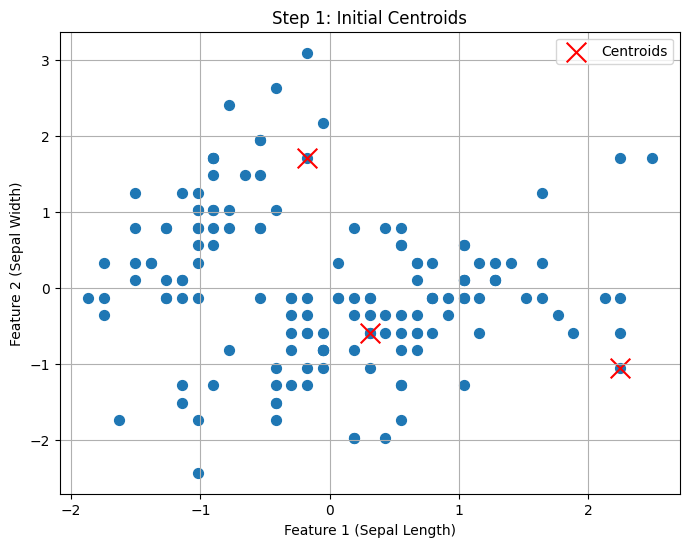

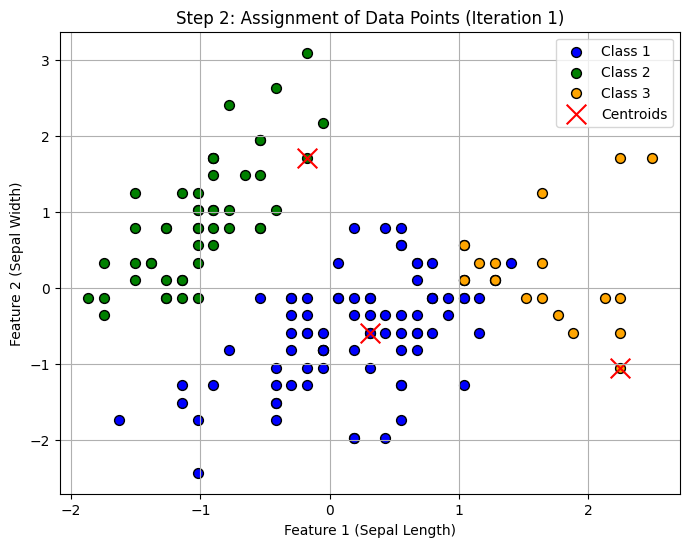

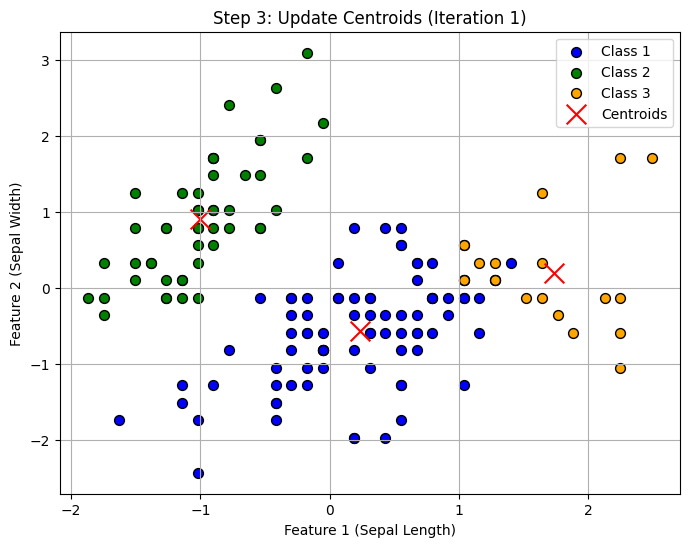

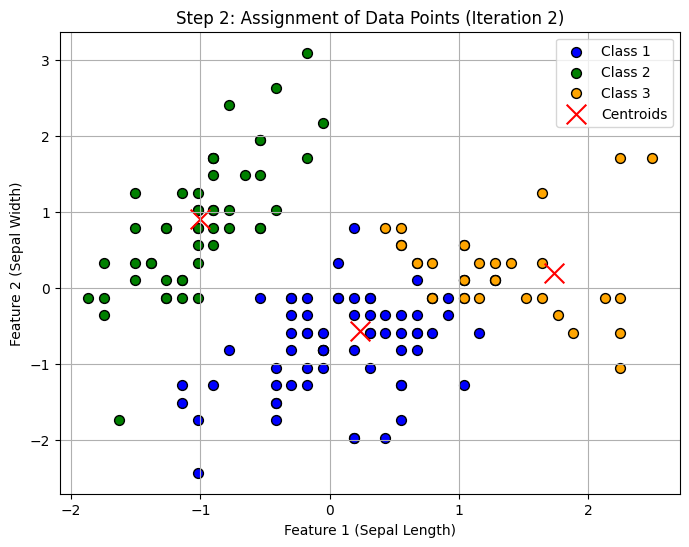

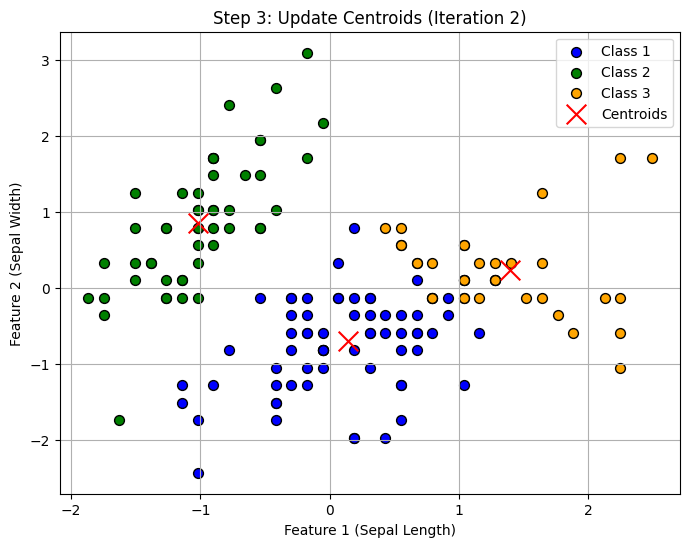

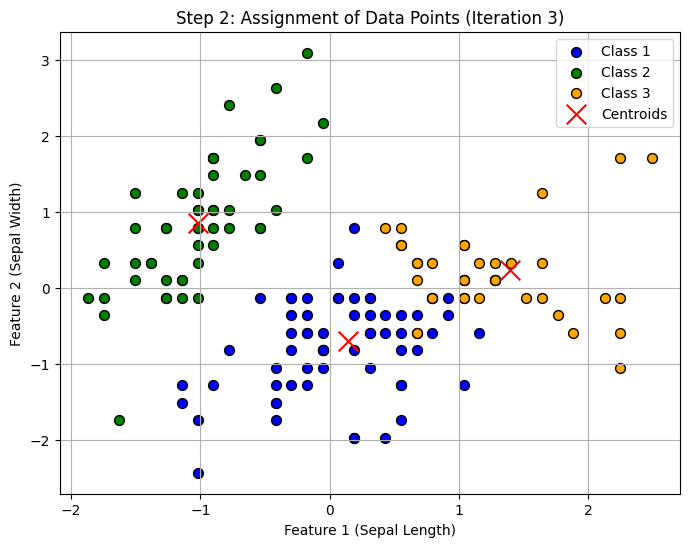

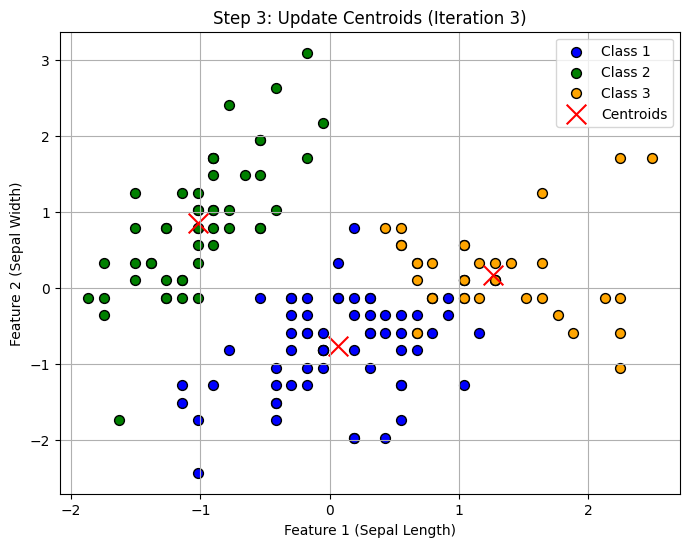

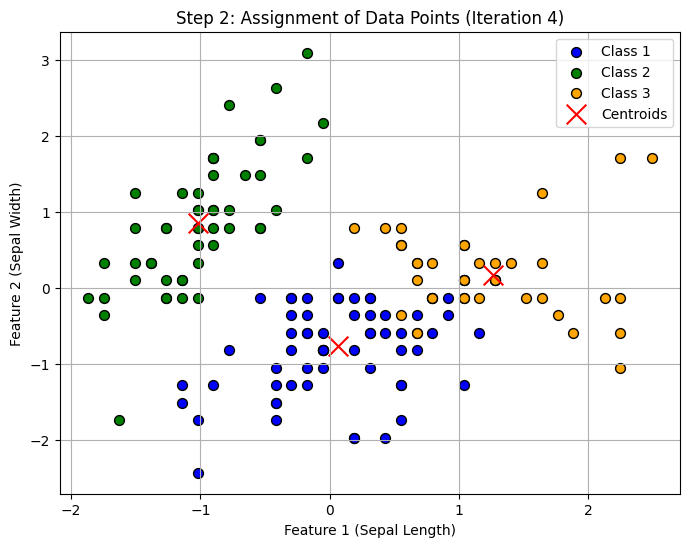

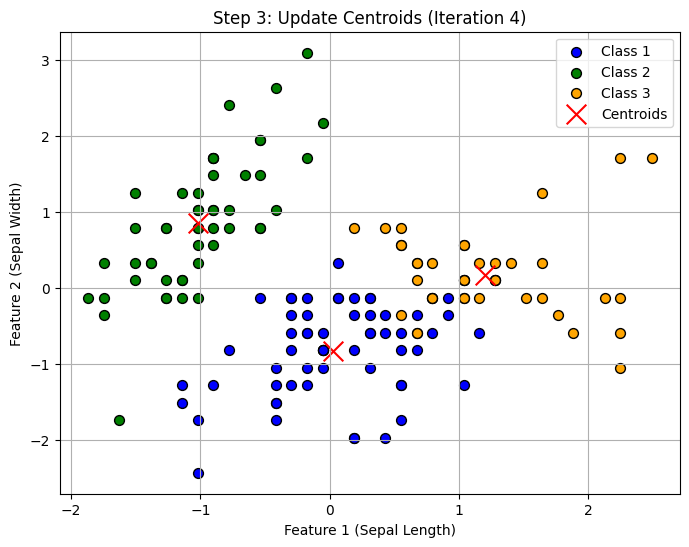

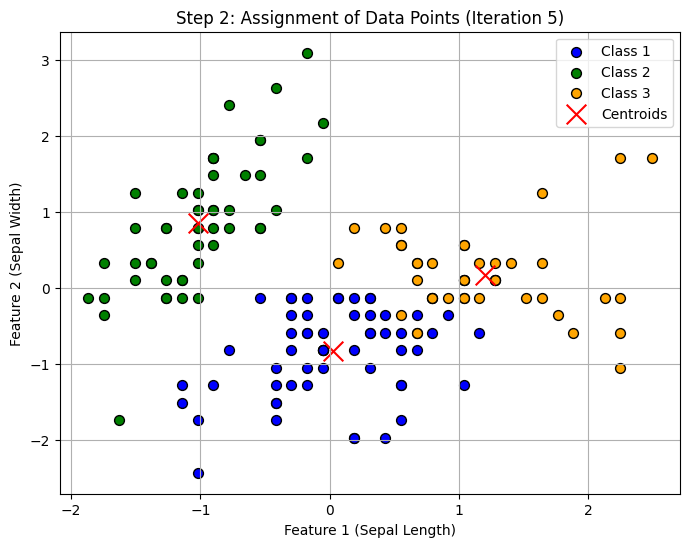

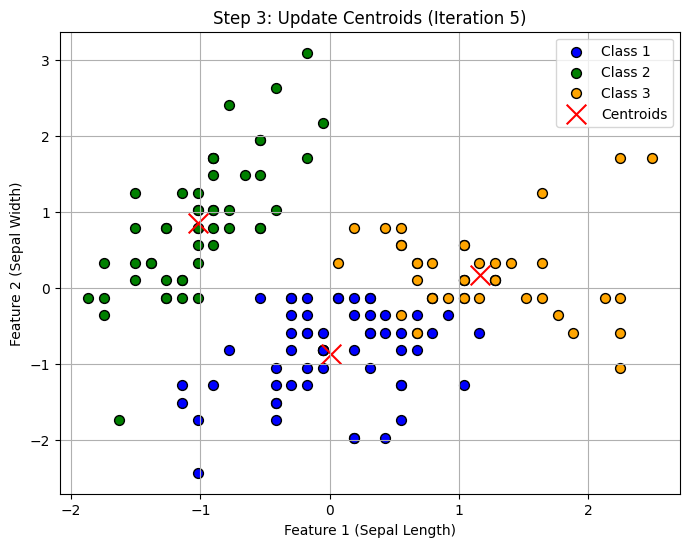

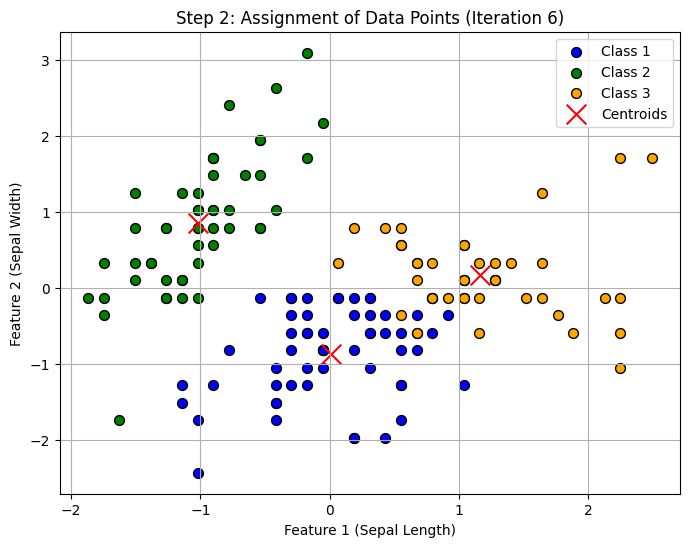

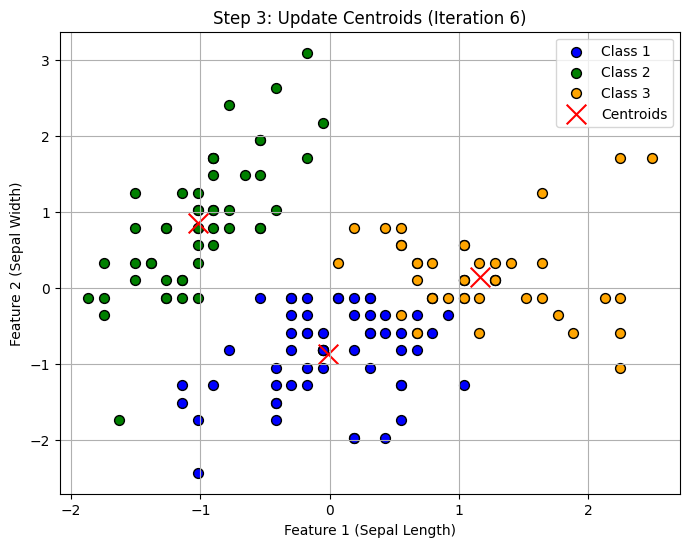

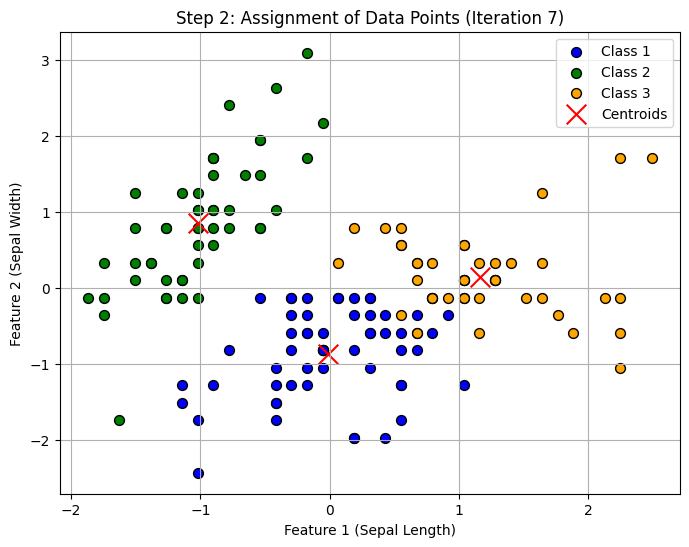

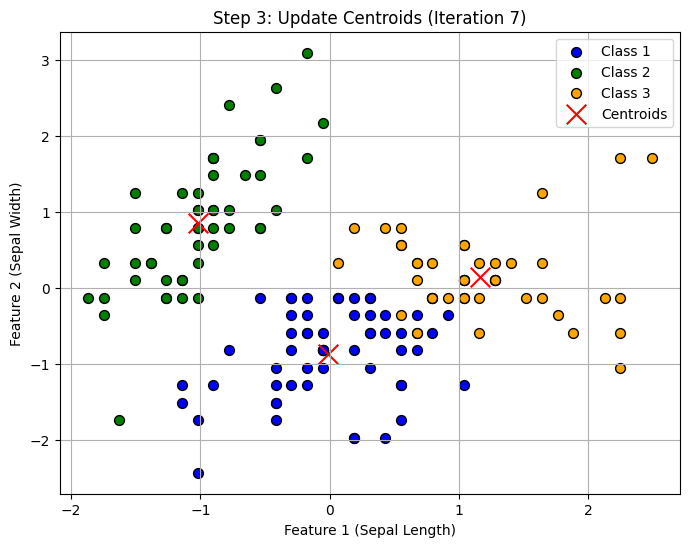

In [8]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.datasets import load_iris  # Load a built-in dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Only use the features for clustering

# Standardize the features to ensure all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change, break the loop (algorithm converged)
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# Function to visualize clustering process at each step, with class names in the legend
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names and their corresponding colors
    class_names = {0: 'Class 1', 1: 'Class 2', 2: 'Class 3'}
    colors = ['blue', 'green', 'orange']

    # Plot data points with labels if they exist
    if labels is not None:
        for class_label in np.unique(labels):
            plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                        label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel('Feature 1 (Sepal Length)')
    plt.ylabel('Feature 2 (Sepal Width)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # We are setting 3 clusters since Iris has 3 categories

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)




---


## **Hierarchical Clustering**


---


### **What is Hierarchical Clustering?**
- Hierarchical clustering is a method of clustering that builds a hierarchy of clusters.
- It works by either **merging smaller clusters into bigger ones** or **dividing larger clusters into smaller ones**.
- This process continues until all data points are in one cluster, or each data point is its own cluster.
  
### **Agglomerative Clustering (Bottom-Up Approach)**
- The most common type of hierarchical clustering is **Agglomerative Clustering**.
- **Agglomerative** means starting with **each data point as its own cluster** and **gradually merging** them into larger clusters.
- The process stops when we reach the desired number of clusters, or when all points are merged into one cluster.

### **Steps in Agglomerative Clustering:**
1. **Start with each data point** as its own cluster.
2. **Calculate the distance** between all pairs of clusters.
3. **Merge the two closest clusters** (clusters with the smallest distance between them).
4. **Update distances** and repeat until all points are in one cluster or we have the desired number of clusters.

---

### **Linkage Criteria in Hierarchical Clustering**

The **linkage criteria** define how the distance between two clusters is calculated. There are three main types of linkage criteria:

1. **Single Linkage (Minimum Distance)**
   - Distance between two clusters is the **smallest distance** between any two points from the two clusters.
   - Good for long, chain-like clusters but can be sensitive to noise.

2. **Complete Linkage (Maximum Distance)**
   - Distance between two clusters is the **largest distance** between any two points from the two clusters.
   - Leads to compact clusters but may break larger clusters into smaller ones.

3. **Average Linkage**
   - Distance between two clusters is the **average distance** between all pairs of points from the two clusters.
   - Balances the behavior of single and complete linkage.

---

### **Visualization with Dendrograms:**
- A **dendrogram** is a tree-like diagram that shows the process of clustering.
- It visualizes how clusters are merged step-by-step and at what distance.
- We can **cut the dendrogram** at different levels to get different numbers of clusters.



## **Dendrograms: Visualizing the Hierarchical Structure**

### **What is a Dendrogram?**
- A **Dendrogram** is a tree-like diagram that shows how clusters are formed step by step in **Hierarchical Clustering**.
- It helps us visualize the merging of clusters and the hierarchy of the data.

### **How to Interpret a Dendrogram:**
- Each **leaf** (bottom node) of the dendrogram represents a **single data point**.
- As we move **upward**, the points that are closer together (have smaller distances) are merged into clusters.
- The **height** at which two clusters are joined represents the **distance between the clusters**.
- To decide the number of clusters, we can **cut the dendrogram** at a certain height. The number of vertical lines that are cut gives the number of clusters.

### **Steps to Create a Dendrogram in Python:**

1. **Generate or load data** that you want to cluster.
2. Use the **`linkage` function** from the `scipy` library to perform hierarchical clustering.
3. Use **`dendrogram` function** from the `scipy` library to plot the dendrogram and visualize the hierarchical structure.

---




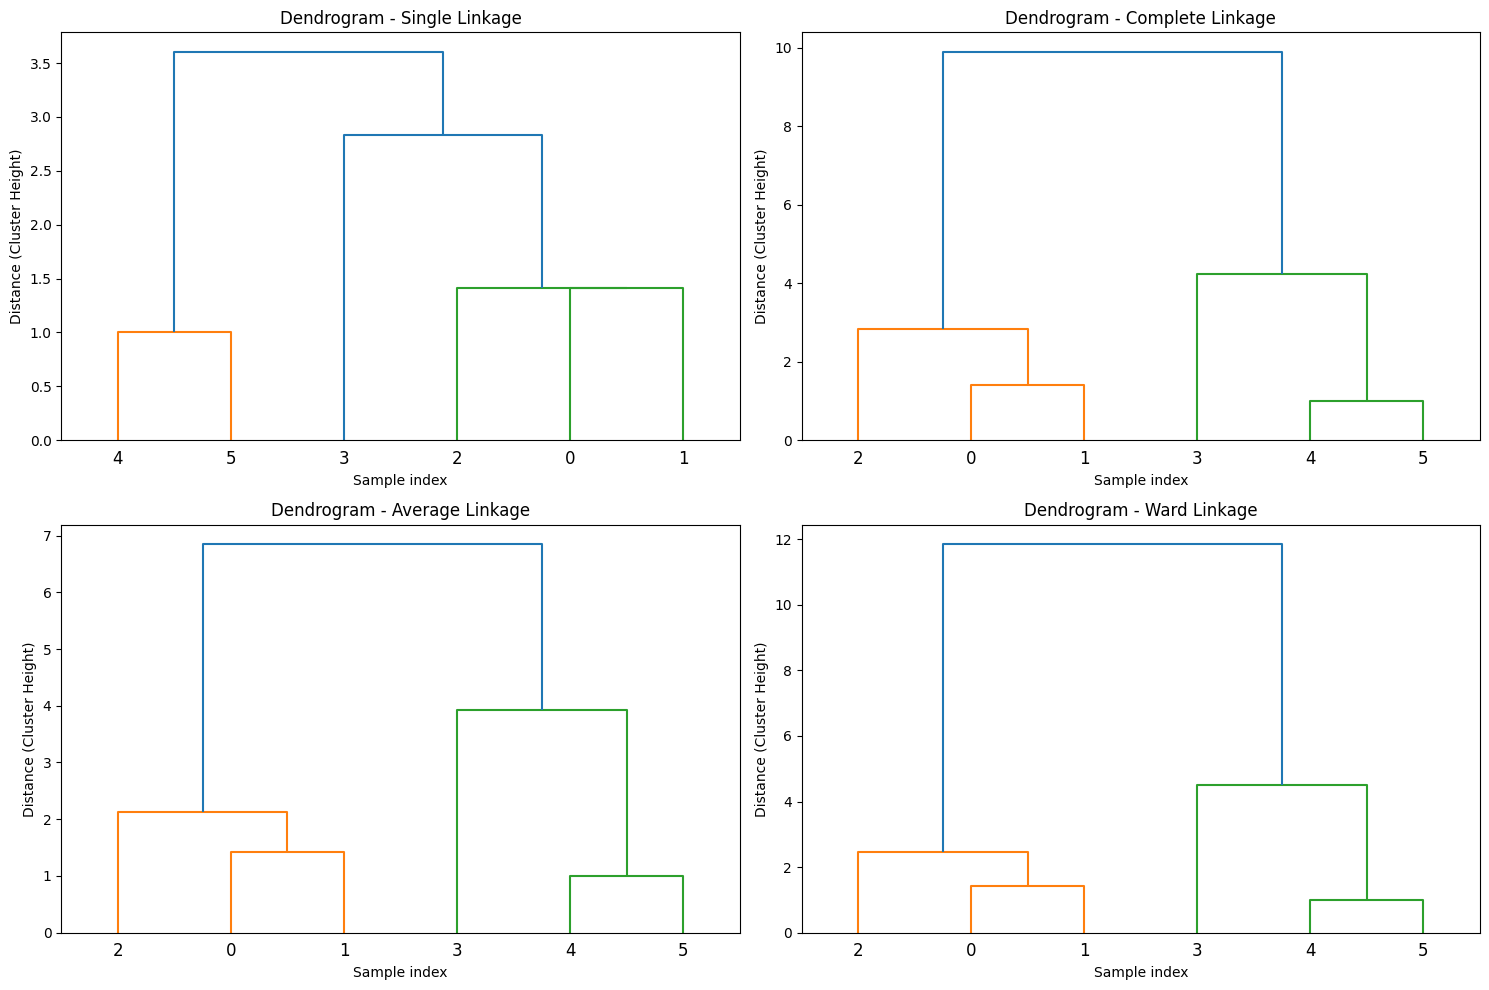

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a small, simple dataset
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [5, 6],
              [8, 8],
              [8, 9]])

# List of linkage methods to try
linkage_methods = ['single', 'complete', 'average', 'ward']

# Create subplots to visualize each type of hierarchical clustering
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    # Perform hierarchical clustering using the linkage function for each method
    linked = linkage(X, method=method)

    # Plot the dendrogram
    plt.subplot(2, 2, i+1)
    dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance (Cluster Height)')

# Show all the plots together
plt.tight_layout()
plt.show()
